In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [38]:
data_org = pd.read_csv(r'C:\Users\MuntasirulHoque\OneDrive - ADA Global\Desktop\ML CODE\student\Students-Test-Score-Who-has-the-edge\Original_data_with_more_rows.csv')
data_extended = pd.read_csv(r'C:\Users\MuntasirulHoque\OneDrive - ADA Global\Desktop\ML CODE\student\Students-Test-Score-Who-has-the-edge\Expanded_data_with_more_features.csv')

In [39]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


In [40]:
data_org.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [41]:
data_org = data_org.drop('Unnamed: 0', axis=1)
data_org.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [42]:
data_org.duplicated().sum()

0

In [43]:
data_org.isna().sum().sum()

0

In [44]:
data_org.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Test score distributions

Text(0.5, 1.0, 'Distribution of the test scores')

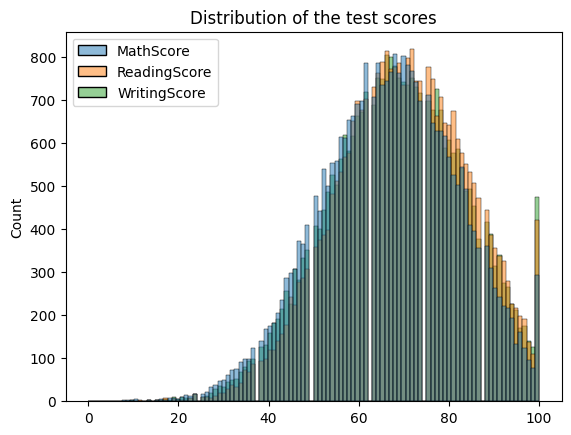

In [46]:
sns.histplot(data_org[['MathScore','ReadingScore','WritingScore']])
plt.title('Distribution of the test scores')

In [49]:
data_org.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.262902,73.093815,72.897692
male,69.269633,66.108957,63.978708


# Extended Dataset

In [50]:
data_extended = data_extended.drop('Unnamed: 0', axis=1)
data_extended.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [51]:
data_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [52]:
data_extended['NrSiblings'] = data_extended['NrSiblings'].astype(pd.Int64Dtype())
data_extended['NrSiblings'].dtypes

Int64Dtype()

In [53]:
data_extended.duplicated().sum()

0

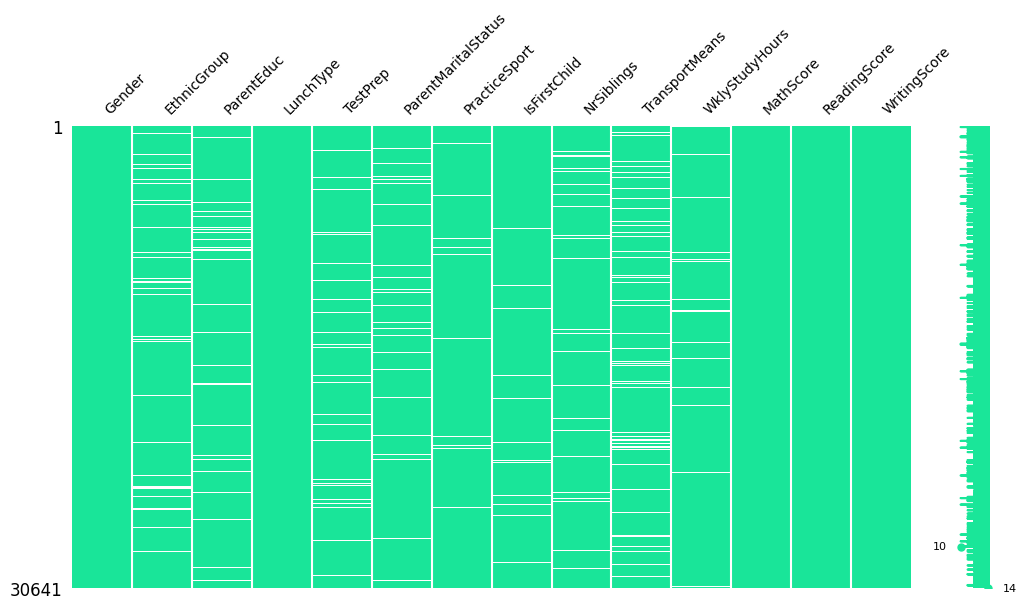

In [54]:
msno.matrix(data_extended,
           figsize=(12, 6),
           color=(0.1, 0.9, 0.6),
           fontsize=10);

In [55]:
for col in data_extended.columns :

    print("Missing values in colmns {} is {} ".format(col, np.round(data_extended[col].isnull().sum()*100/(len(data_extended[col])), 1)))

Missing values in colmns Gender is 0.0 
Missing values in colmns EthnicGroup is 6.0 
Missing values in colmns ParentEduc is 6.0 
Missing values in colmns LunchType is 0.0 
Missing values in colmns TestPrep is 6.0 
Missing values in colmns ParentMaritalStatus is 3.9 
Missing values in colmns PracticeSport is 2.1 
Missing values in colmns IsFirstChild is 3.0 
Missing values in colmns NrSiblings is 5.1 
Missing values in colmns TransportMeans is 10.2 
Missing values in colmns WklyStudyHours is 3.1 
Missing values in colmns MathScore is 0.0 
Missing values in colmns ReadingScore is 0.0 
Missing values in colmns WritingScore is 0.0 


In [56]:
data_extended = data_extended.apply(lambda x: x.fillna(x.value_counts().index[0]))
null_val = data_extended.isna().sum().sum()

if null_val > 0:
    print('Try imputing again, there are {} null values remaining in the dataset'.format(null_val))
else:
    print('Congratulations! You have successfully imputed all the null values in the dataset.')

Congratulations! You have successfully imputed all the null values in the dataset.


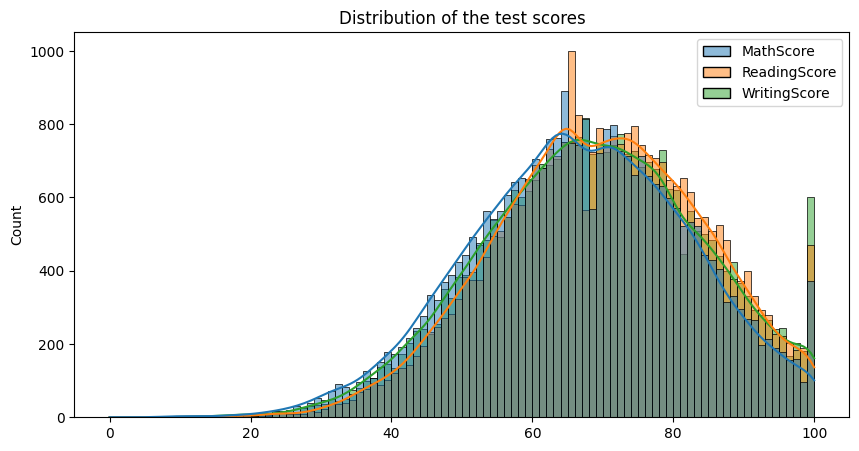

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data_extended[['MathScore', 'ReadingScore', 'WritingScore']], bins=100,  kde=True)
plt.title('Distribution of the test scores');

In [59]:
def display_stats(df, col):
    '''
    Given a dataFrame and the column name, this function calculates and returns two stats summary dataframes. 
    - A normalized value_counts of the categories in the given columns "col" and 
    - A sorted mean of the three test scores grouped by the categories in column "col"    
    '''
    
    val_cnt = df[col].value_counts().to_frame(name=col + ' (count)')
    val_cnt_norm = df[col].value_counts(normalize=True).mul(100).to_frame(name=col + ' (%)')
    
    val_cnt_table = pd.concat([val_cnt, val_cnt_norm], axis=1)
    
    mean_score_summary = df.groupby([col])[['MathScore', 'ReadingScore', 'WritingScore']]\
    .agg(np.mean).sort_values(by='MathScore', ascending=False)
    
    return display(val_cnt_table, mean_score_summary)

In [60]:
data_extended[['MathScore', 'ReadingScore', 'WritingScore']].agg([np.mean, np.std, np.max, np.min])

,MathScore,ReadingScore,WritingScore
mean,66.558402,69.377533,68.418622
std,15.361616,14.758952,15.443525
amax,100.000000,100.000000,100.000000
amin,0.000000,10.000000,4.000000


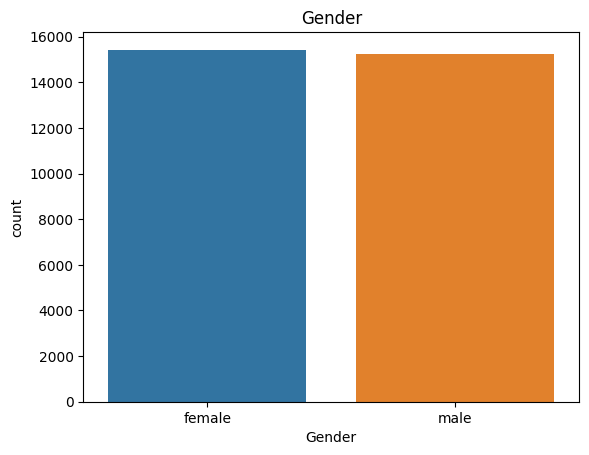

In [61]:
sns.countplot(x=data_extended['Gender'])
plt.title('Gender');

In [62]:
data_extended.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


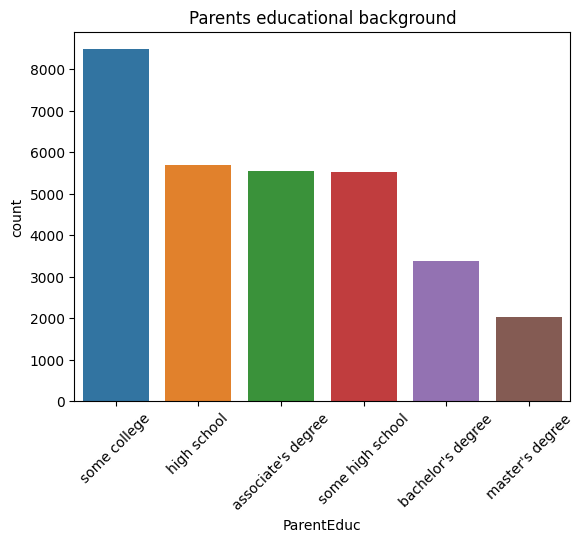

In [63]:
sns.countplot(x=data_extended['ParentEduc'], \
              order=['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"])
plt.title('Parents educational background')
plt.xticks(rotation=45);

In [64]:
display_stats(data_extended, 'ParentEduc')

,ParentEduc (count),ParentEduc (%)
some college,8478,27.668810
high school,5687,18.560099
associate's degree,5550,18.112986
some high school,5517,18.005287
bachelor's degree,3386,11.050553
master's degree,2023,6.602265


,MathScore,ReadingScore,WritingScore
ParentEduc,,,
master's degree,72.336134,75.832921,76.356896
bachelor's degree,70.466627,73.062020,73.331069
associate's degree,68.365586,71.124324,70.299099
some college,66.445978,69.189667,68.456711
high school,64.435731,67.213997,65.421136
some high school,62.584013,65.510785,63.632409


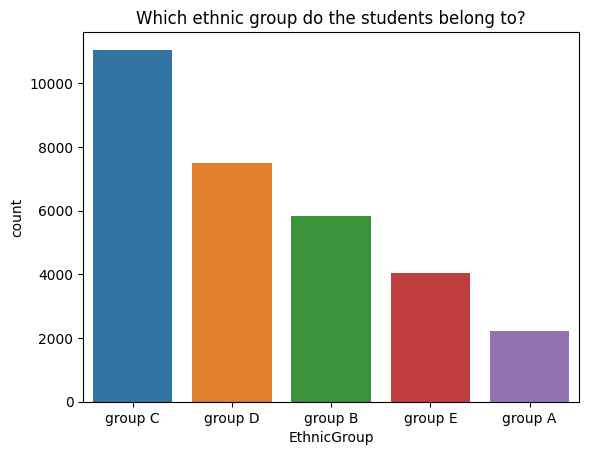

In [65]:
sns.countplot(x=data_extended['EthnicGroup'], \
              order=['group C', 'group D', 'group B', 'group E', 'group A'])
plt.title('Which ethnic group do the students belong to?');

In [66]:
display_stats(data_extended,'EthnicGroup')

,EthnicGroup (count),EthnicGroup (%)
group C,11052,36.069319
group D,7503,24.486799
group B,5826,19.013740
group E,4041,13.188212
group A,2219,7.241931


,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group E,75.298936,74.251423,72.677060
group D,67.666400,70.382247,70.890844
group C,64.943811,68.517734,67.149294
group B,63.490216,67.320460,65.895125
group A,62.991888,66.787742,65.251915


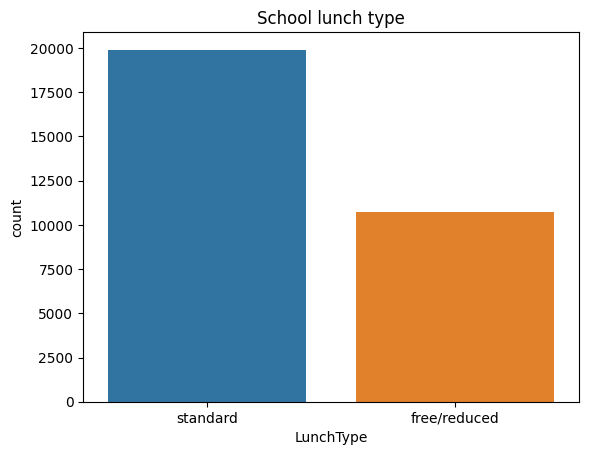

In [67]:
sns.countplot(x=data_extended['LunchType'])
plt.title('School lunch type');

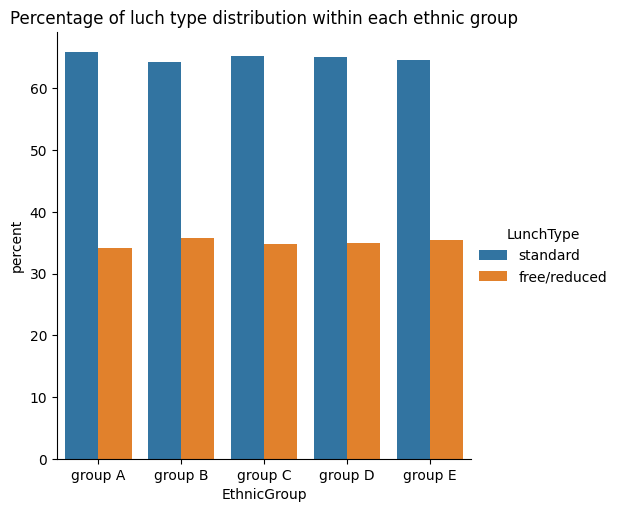

In [68]:
# fig, ax = plt.subplots(figsize=(10, 5))
x, y = 'EthnicGroup', 'LunchType'
data_extended.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()\
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
plt.title('Percentage of luch type distribution within each ethnic group');

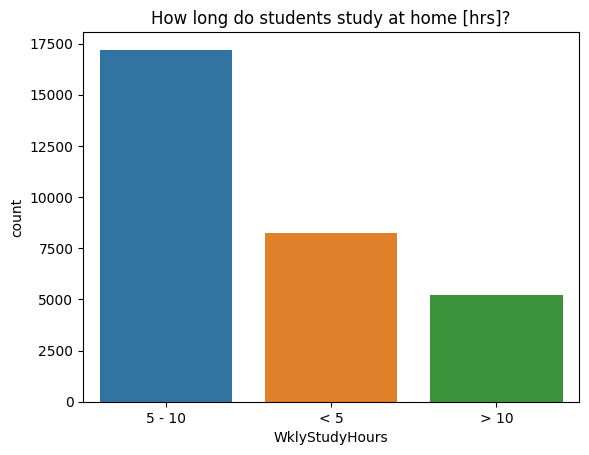

In [69]:
sns.countplot(x=data_extended['WklyStudyHours'], \
             order=['5 - 10', '< 5', '> 10'])
plt.title('How long do students study at home [hrs]?');

In [70]:
display_stats(data_extended, 'WklyStudyHours')

,WklyStudyHours (count),WklyStudyHours (%)
5 - 10,17201,56.137202
< 5,8238,26.885546
> 10,5202,16.977253


,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
> 10,68.696655,70.365436,69.777778
5 - 10,66.859078,69.654148,68.643800
< 5,64.580359,68.176135,67.090192


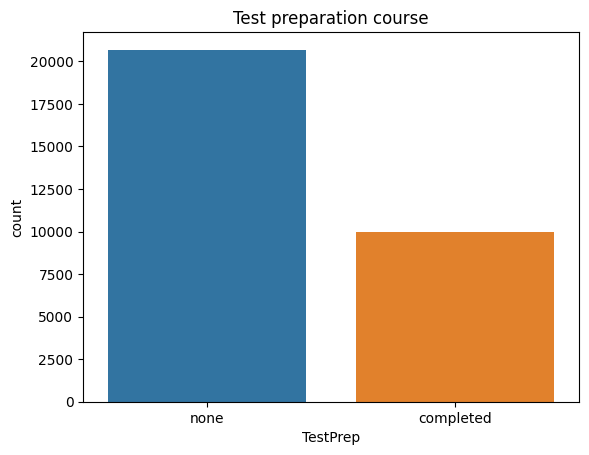

In [71]:
sns.countplot(x=data_extended['TestPrep'])
plt.title('Test preparation course');

In [72]:
display_stats(data_extended, 'TestPrep')

,TestPrep (count),TestPrep (%)
none,20686,67.510851
completed,9955,32.489149


,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.546660,73.732998,74.703265
none,65.120323,67.281495,65.394180


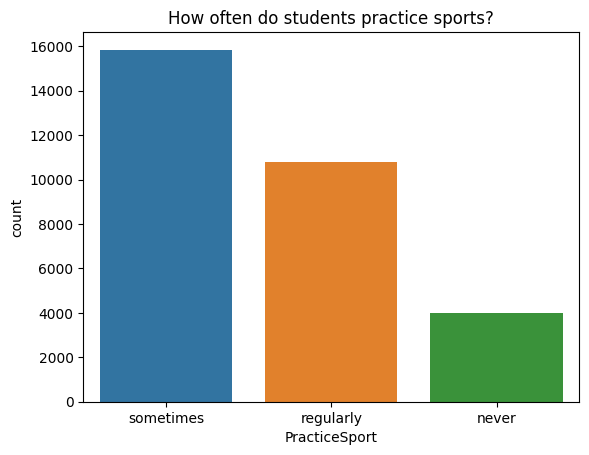

In [73]:
sns.countplot(x=data_extended['PracticeSport'], \
             order = ['sometimes', 'regularly', 'never'])
plt.title('How often do students practice sports?');

In [74]:
display_stats(data_extended, 'PracticeSport')

,PracticeSport (count),PracticeSport (%)
sometimes,15844,51.708495
regularly,10793,35.224046
never,4004,13.067459


,MathScore,ReadingScore,WritingScore
PracticeSport,,,
regularly,67.839155,69.943019,69.604003
sometimes,66.289258,69.255112,68.090255
never,64.171079,68.337662,66.522727


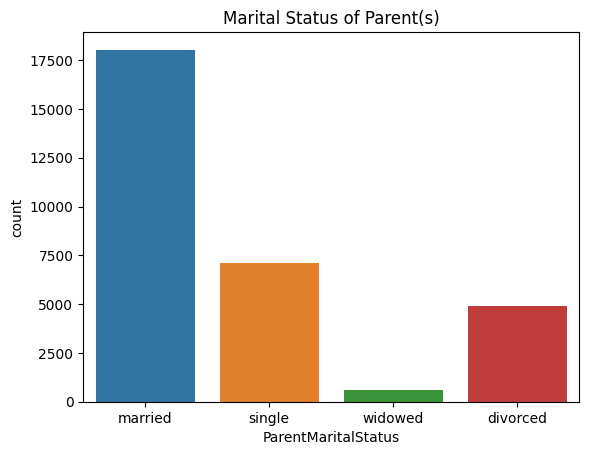

In [75]:
sns.countplot(x=data_extended['ParentMaritalStatus'])
plt.title('Marital Status of Parent(s)');

In [76]:
display_stats(data_extended, 'ParentMaritalStatus')

,ParentMaritalStatus (count),ParentMaritalStatus (%)
married,18034,58.855781
single,7097,23.161777
divorced,4919,16.053654
widowed,591,1.928788


,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
widowed,67.368866,69.651438,68.563452
divorced,66.691197,69.655011,68.799146
married,66.650161,69.379561,68.406177
single,66.165704,69.157250,68.174440
